In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("sales_data.csv", parse_dates=['Date'])

# Preview data
print(df.head())


        Date  Sales
0 2023-01-01    214
1 2023-01-02    198
2 2023-01-03    224
3 2023-01-04    253
4 2023-01-05    203


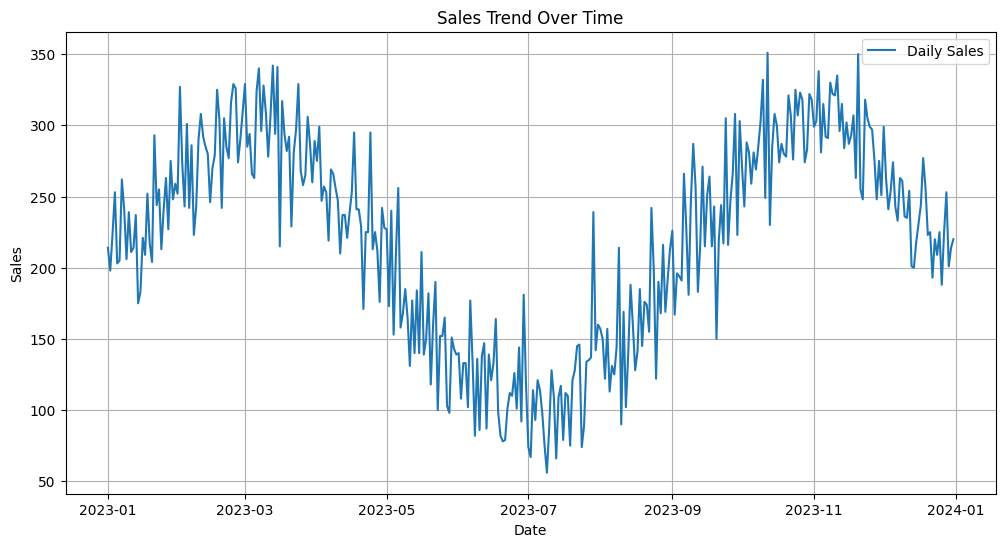

In [2]:
import matplotlib.pyplot as plt

# Set date as index
df.set_index('Date', inplace=True)

# Plot sales data
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Daily Sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


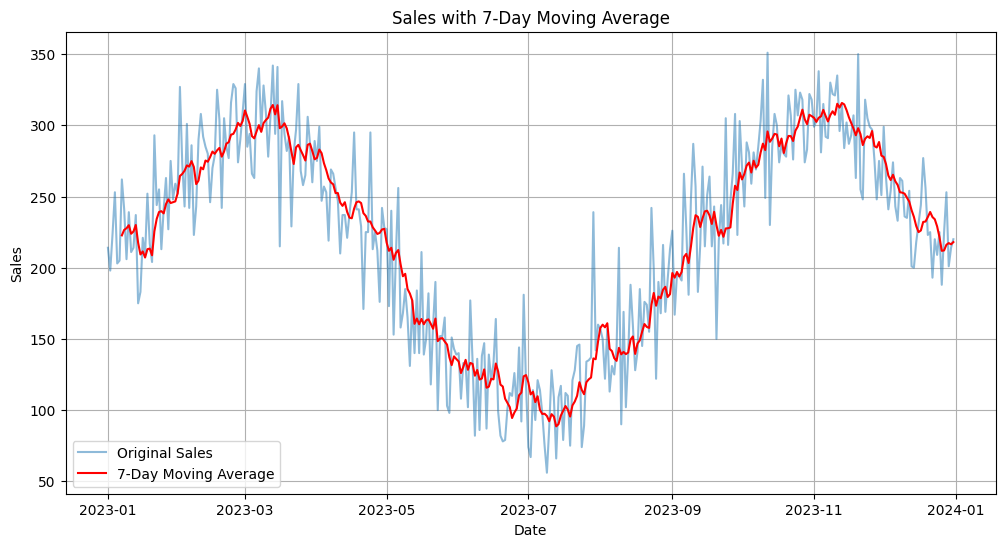

In [3]:
# 7-day moving average
df['7_day_avg'] = df['Sales'].rolling(window=7).mean()

# Plot original and smoothed trend
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Original Sales', alpha=0.5)
plt.plot(df['7_day_avg'], label='7-Day Moving Average', color='red')
plt.title('Sales with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


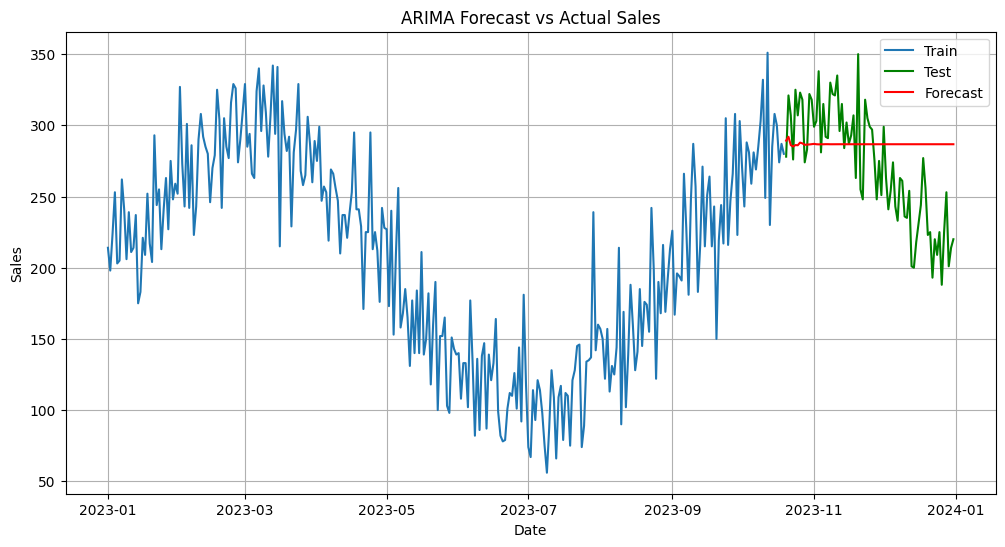

In [4]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Train-test split (80-20)
train = df['Sales'][:int(0.8*len(df))]
test = df['Sales'][int(0.8*len(df)):]

# Fit ARIMA model
model = ARIMA(train, order=(5,1,0))  # You can tune (p,d,q)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot forecast vs actual
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 43.24
MAE: 35.69
